In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

## FGS Demo Messung

Unsere Messwerte und wie schätzen wir die Fehler ab?

In [9]:
t = np.array([1.8, 3.0, 4.2, 7.2, 8.0, 10.0])
U = np.array([3.2, 2.2, 1.2, 0.5, 0.4, 0.2])
U_0 = 5
print(U)
t_err = 0.5
Delta_U = 0.2

U_err = []
for u_i in U: 
    res = u_i/U_0 * (Delta_U/u_i + Delta_U/U_0)
    U_err.append(res)

[3.2 2.2 1.2 0.5 0.4 0.2]


In [4]:
a, b = np.polyfit(t, np.log(U), 1)
print(f'Die Steigung beträgt {a}')

x_ausgleich = np.linspace(t[0]-0.5, t[-1]+0.5, 100)
y_ausgleich = np.exp(a*x_ausgleich+b)

Die Steigung beträgt -0.33490306900420885


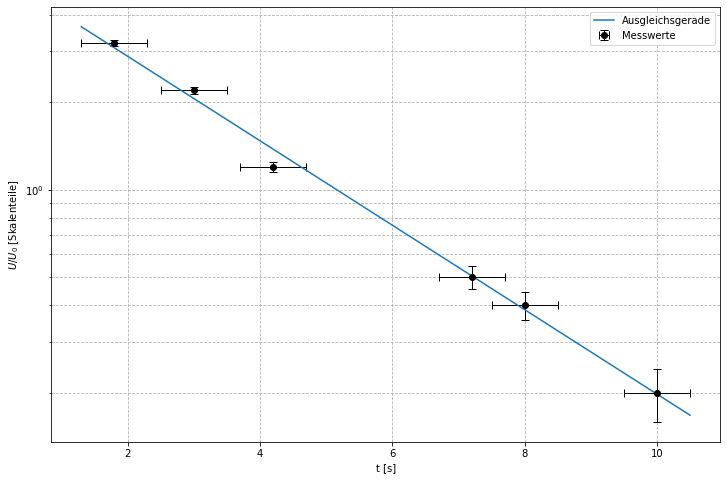

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('t [s]')
ax.set_ylabel('$U/U_0$ [Skalenteile]')
ax.grid(which='both', linestyle='--')
ax.set_yscale('log')
ax.errorbar(t, U, xerr=t_err, yerr=U_err,fmt='o', color = 'k', ecolor='k', elinewidth = 1, capsize=4, label='Messwerte')
#-----Ausgleichsgerade-----#
ax.plot(x_ausgleich, y_ausgleich, label='Ausgleichsgerade')
#--------------------------#
ax.legend()